In [138]:
#Importing our neccessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [139]:
train_data = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')

#The following code simply checks if the datasets have successfully been imported from the computer's files
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
#The following code returns the total number of missing values for each column in the table
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

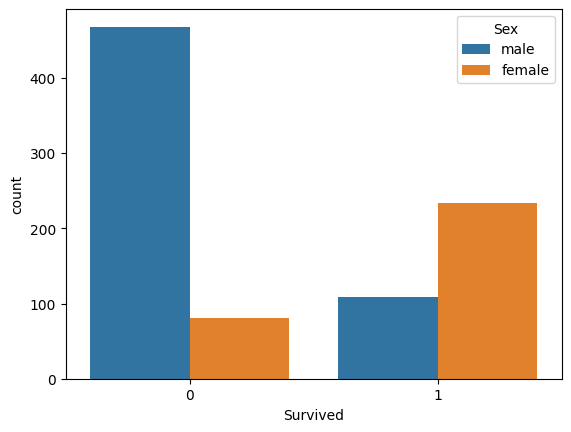

In [141]:
#Here, I have made use of Seaborn to graphically compare those who survived on the titanic to those who died
sns.countplot(x='Survived', data=train_data, hue = 'Sex')

In [142]:
#Short piece of code working out the percentage of men and women who survived on the Titanic 
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [143]:
#Short piece of code which finds survivial rates based off of point of Embarkation 
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


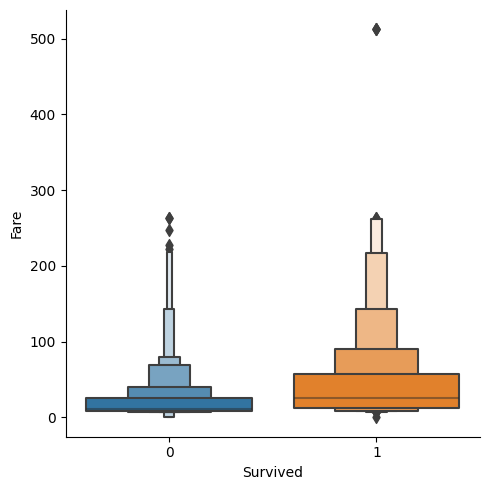

In [144]:
#Here, I am comparing the fare price for those who survived versus those who died
sns.catplot(x="Survived",y="Fare",data=train_data, kind="boxen")

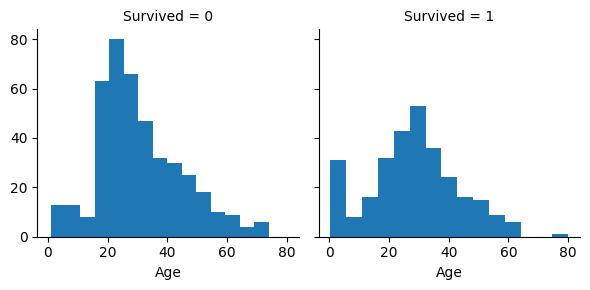

In [145]:
#Code comparing the age of those who survived versus those who didn't 
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=15)

In [146]:
#The following code replaces any null values in the 'Age' column with the median of the ages 
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True) 

#We can also do the same thing with the missing fare prices
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

/tmp/ipykernel_30/108450467.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipykernel_30/108450467.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [147]:
#The following code replaces any null values in the 'Embarked' column with the modal port
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_30/1455618517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


In [148]:
#Here, we have used the pd.get_dummies() function to convert our 'Sex' and 'Embarked' values into numbers
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [149]:
#These are the features we will use to train our model. 
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = train_data[features]
y = train_data['Survived']
X_test = test_data[features]

In [150]:
#This function split the dataset into a training set and a validation set. The training set is used to train the model and the validation set is used to evaluate how well the model performs on unseen data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#This initialises our random forest model, training the model using the training data 'X_train' and 'y_train'
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [151]:
#Here, we are using our trained model to make predictions on the validation set 'X_val'. The accuracy_score function compares the predicted values from 'y_pred' to the actual values from 'y_val', and outputs the validation accuracy as a percentage
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

#We then use our trained model to make predictions on the test set 'X_test'
test_predictions = model.predict(X_test)

Validation Accuracy: 81.56%


In [152]:
#Finally, we save our predictions to an external csv file and print a message to confirm that the submission file has been created
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_predictions})
output.to_csv('submission.csv', index=False)
print("Submission file has been created.")

Submission file has been created.
